<a href="https://colab.research.google.com/github/Yobany1210/TalentoTech/blob/main/tutoria_limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **El problema del negocio**

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


##3. Una primera mirada al Dataset

In [ ]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Lectura
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Talento Tech/dataset_banco.csv'
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Veamos las variables categorizadas y númericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.


## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.



In [ ]:
# conteo de los niveles en la diferentes columnas catagorizadas

cols_cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna(col): {data[col].nunique()} subniveles')

Columna(col): 18 subniveles
Columna(col): 6 subniveles
Columna(col): 10 subniveles
Columna(col): 2 subniveles
Columna(col): 2 subniveles
Columna(col): 6 subniveles
Columna(col): 5 subniveles
Columna(col): 12 subniveles
Columna(col): 6 subniveles
Columna(col): 2 subniveles


Todas las columnas categóricas tienen más se un subnivel. No eliminamos ninguna.

Verifiquemos que ocurren con las columnas númericas

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservamos todas las columnas numéricas.

La desviación estándar es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.


In [ ]:
# Conteo de valores con -1
count = data['pdays'].value_counts()[-1]
print(count)

36953


In [ ]:
# Calcular le media del atributo "pdays: días de contacto al usuario antes de la campaña actual"
media = data['pdays'].mean()

print("Promedio de días de contacto:", media)

Promedio de días de contacto: 40.17822461123277


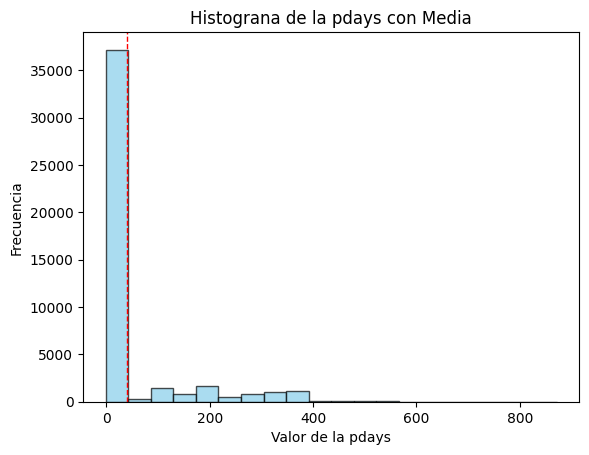

In [ ]:
# "Graficar un histograna del atributo "pdays"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor= "Black", alpha=0.7)

# Agreger on linea vertical para nostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel("Valor de la pdays")
plt.ylabel("Frecuencia")
plt.title("Histograna de la pdays con Media")

# Mostrar la gráfica
plt.show()

In [ ]:
# Calcula la desviación estándar del atributo "pdays"
desviacion_estandar = data['pdays'].std()

print('Desviación estándar de la pdays:', desviacion_estandar)

Desviación estándar de la pdays: 100.10328306134589


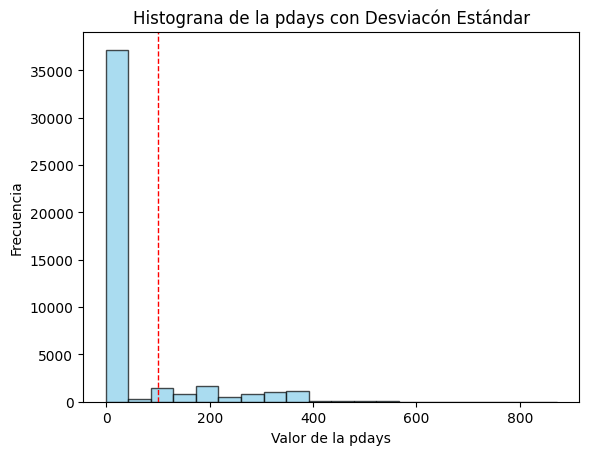

In [ ]:
# "Graficar un histograna del atributo "campaña"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor= "Black", alpha=0.7)

# Agreger on linea vertical para nostrar la media
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel("Valor de la pdays")
plt.ylabel("Frecuencia")
plt.title("Histograna de la pdays con Desviacón Estándar")

# Mostrar la gráfica
plt.show()

#4.3 Filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')


Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


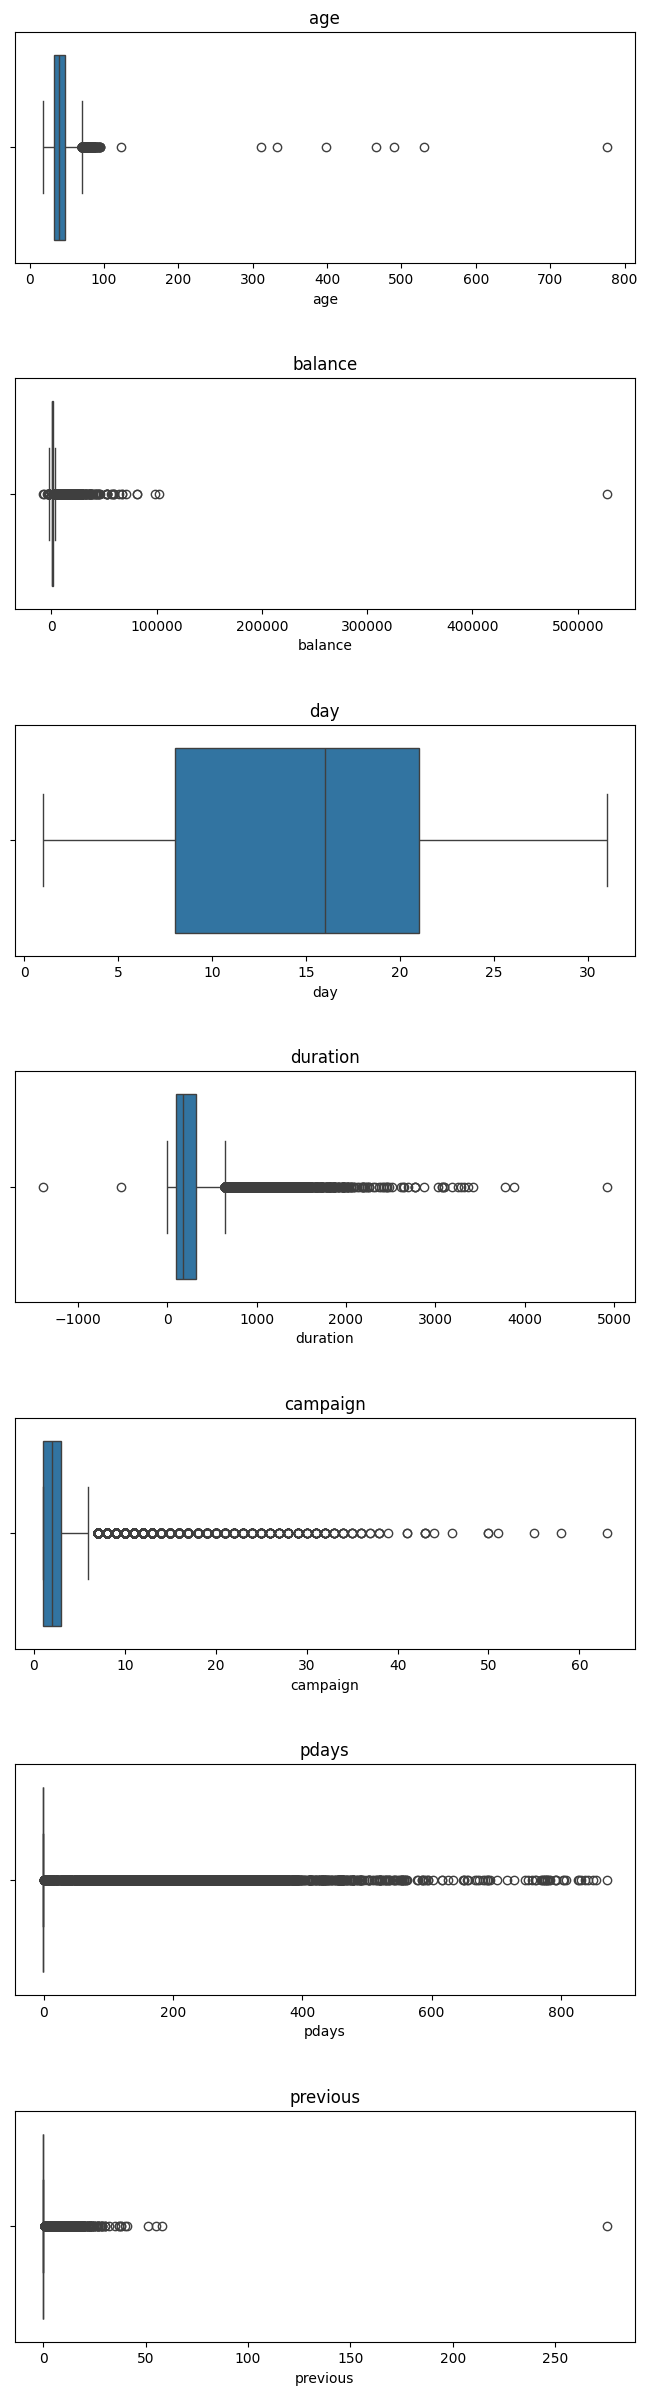

In [ ]:
# Generar gráficas Individuales pues las variables númericas
# están en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows =7, ncols=1, figsize=(8,30))
fig. subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)


## 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:




In [ ]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age']> 100].index)
print(f'Tanaño del set después de eliminar registros de edad:{data.shape}')


Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tanaño del set después de eliminar registros de edad:(45195, 17)


In [ ]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duration']< 0].index)
#data = data[data['duration']> 0]
print(f'Tamaño del set después de eliminar registros de duración:{data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración:(45193, 17)


In [ ]:
# Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data.drop(data[data['previous']>100].index)
#data = data[data['previous']<= 100]
print(f'Tanaño del set después de eliminar registros de previous:{data.shape}')

Tamaño del set antes de eliminar registros de previous: (45193, 17)
Tanaño del set después de eliminar registros de previous:(45192, 17)


## 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles


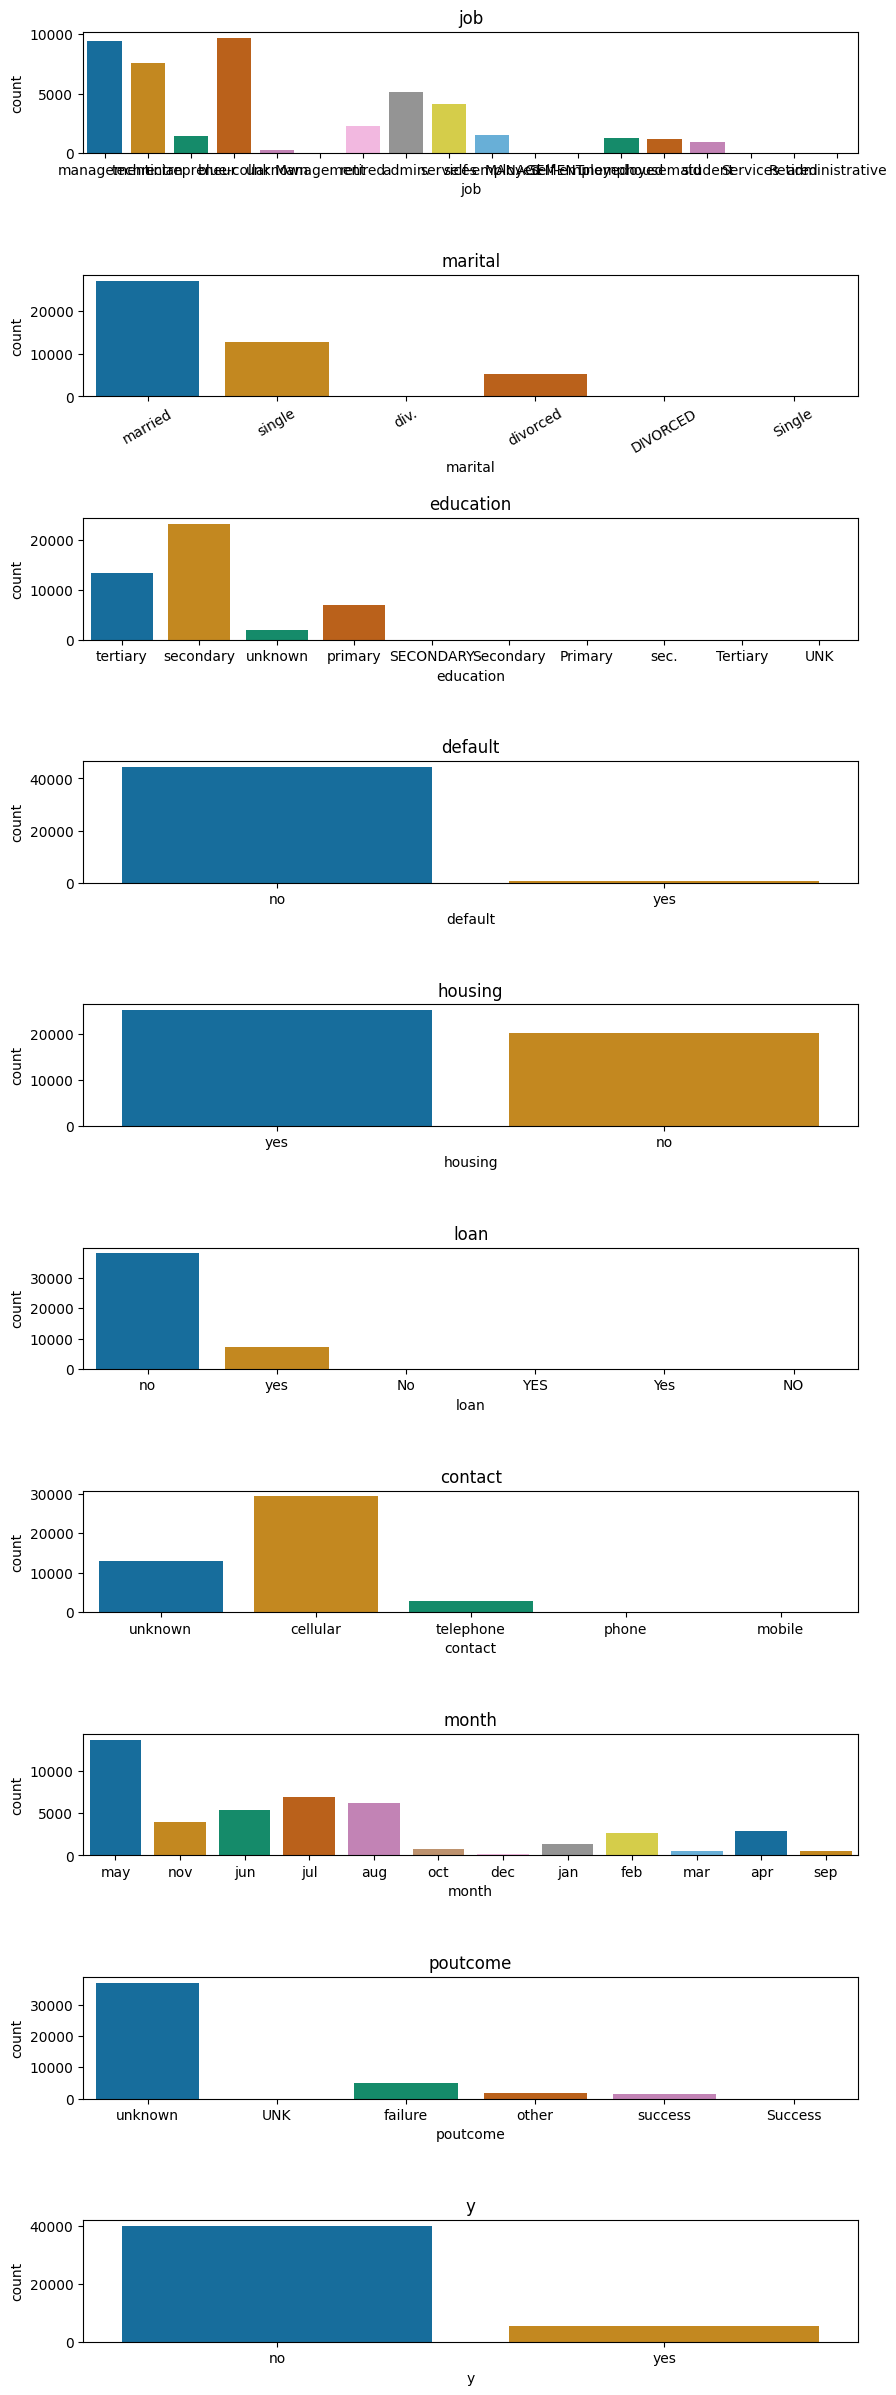

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows =10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette = 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[1].tick_params(axis='x', labelrotation = 30)


## 4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles


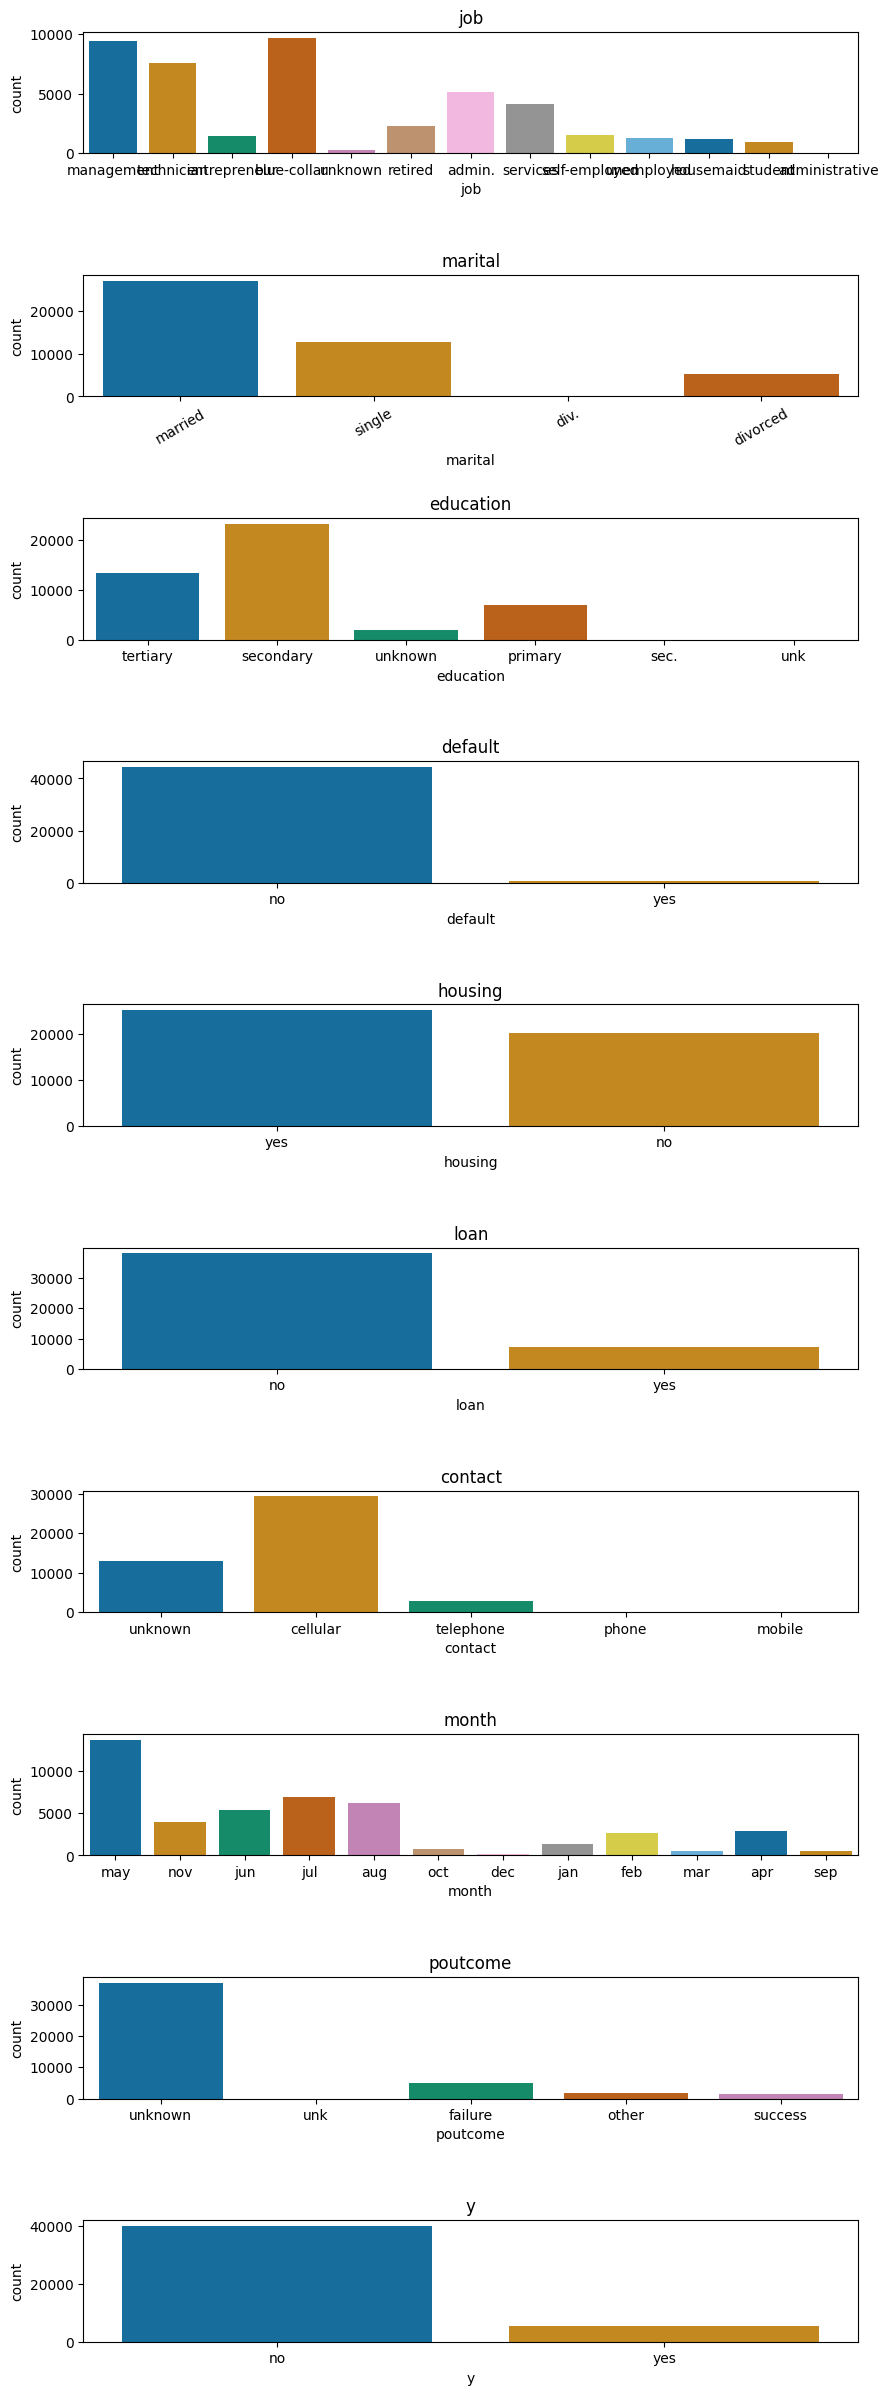

In [ ]:
for column in data.columns:
  # Representar en minúsculas solo si la columna es categórica
  if column in cols_cat:
      data[column] = data[column].str.lower()

# Y generemos las graficas nuevamente
fig, ax = plt.subplots(nrows =10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette = 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[1].tick_params(axis='x', labelrotation = 30)



In [ ]:

# job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# marital: unificar div. y divorced
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.', 'divorced', regex=False)
print (data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [ ]:
# education: unificar sec. y secundary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.', 'secundary', regex=False)
data.loc[data['education']=='unk', 'education']= 'unknown'
print (data['education'].unique())



['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary' 'secundary']


In [ ]:
# contact: unificar telephone y phone
print(data['contact'].unique())
data.loc[data['contact']=='phone', 'contact']= 'telephone'
data.loc[data['contact']=='mobile', 'contact']= 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
# poutcome: unificar unk y unknown
print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk', 'poutcome']= 'unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [ ]:
data.shape

(45192, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Talento Tech/Data_Clean/dataset_banco_clean.csv"
data.to_csv(ruta, index=False)